In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [5]:
# Load the Excel file
file_path = 'AirborneEmissions_Processed.xlsx'
sheet_name = 'Arsenic'  # Change this to the desired sheet name

# Read the data
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the data
print(data.head())

  Sources    1990    1991    1992    1993    1994    1995    1996    1997  \
0       A   0.113   0.114   0.109   0.110   0.114   0.115   0.115   0.095   
1       B   0.440   0.412   0.360   0.384   0.313   0.211   0.221   0.235   
2       C  23.995  23.134  23.071  22.844  22.730  22.491  22.092  22.187   
3       D  17.859  17.404  16.145  13.660  12.316   9.511   8.903   5.574   
4       E   1.080   1.116   1.074   0.973   0.681   0.658   0.655   0.192   

     1998  ...    2013    2014    2015    2016    2017    2018    2019  \
0   0.096  ...   0.071   0.077   0.073   0.070   0.069   0.071   0.066   
1   0.230  ...   0.119   0.126   0.104   0.111   0.112   0.119   0.098   
2  21.213  ...  15.684  15.649  14.870  13.426  13.197  12.877  12.988   
3   6.218  ...   1.206   0.948   0.794   0.856   0.507   0.393   0.256   
4   0.189  ...   0.045   0.037   0.041   0.064   0.044   0.073   0.033   

     2020    2021    2022  
0   0.067   0.072   0.067  
1   0.102   0.107   0.110  
2  12.73

In [8]:
# Extract the 'Sources' column (categorical variable)
sources = data['Sources']

# One-hot encode the 'Sources' column
encoder = OneHotEncoder(sparse_output=False)
sources_encoded = encoder.fit_transform(sources.values.reshape(-1, 1))

In [9]:
# Convert encoded sources to DataFrame and concatenate with the original data
sources_encoded_df = pd.DataFrame(sources_encoded, columns=encoder.get_feature_names_out(['Source']))
data_encoded = pd.concat([sources_encoded_df, data.drop(columns=['Sources'])], axis=1)


In [13]:
# Define features (X) as all years from 1990 to 2021 (excluding the target year 2022)
X = data_encoded.drop(columns=[2022])  # Use integer 2022 to drop the target column

# Define the target variable (y) as the emission values for the year 2022
y = data_encoded[2022]  # Use integer 2022 to select the target column

In [14]:
# Check for missing values
if X.isnull().any().any() or y.isnull().any():
    print("Missing values found. Consider filling or dropping them.")

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Convert all column names to strings to ensure compatibility with scikit-learn
data_encoded.columns = data_encoded.columns.astype(str)

# Define features (X) as all years from 1990 to 2021 (excluding the target year 2022)
X = data_encoded.drop(columns=['2022'])  # We keep all the past years as features except for 2022

# Define the target variable (y) as the emission values for the year 2022
y = data_encoded['2022']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
score = model.score(X_test, y_test)
print(f"Model R^2 score on test set: {score:.4f}")

# Create a DataFrame to hold future year predictions
future_years = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030']
future_predictions = pd.DataFrame(index=data_encoded.index)

# For each future year, predict emissions using the trained model
for year in future_years:
    future_predictions[year] = model.predict(X)  # Use the same feature set to predict future emissions

# Show future predictions
print(future_predictions)

# Optionally, save the predictions to a CSV file
future_predictions.to_csv('future_emissions_predictions_2023_2030.csv', index=False)

Model R^2 score on test set: 0.9449
         2023       2024       2025       2026       2027       2028  \
0    0.058455   0.058455   0.058455   0.058455   0.058455   0.058455   
1    0.098567   0.098567   0.098567   0.098567   0.098567   0.098567   
2   12.263000  12.263000  12.263000  12.263000  12.263000  12.263000   
3    0.179000   0.179000   0.179000   0.179000   0.179000   0.179000   
4    0.035000   0.035000   0.035000   0.035000   0.035000   0.035000   
5    0.064000   0.064000   0.064000   0.064000   0.064000   0.064000   
6    0.102000   0.102000   0.102000   0.102000   0.102000   0.102000   
7    4.301000   4.301000   4.301000   4.301000   4.301000   4.301000   
8    0.003613   0.003613   0.003613   0.003613   0.003613   0.003613   
9    0.003000   0.003000   0.003000   0.003000   0.003000   0.003000   
10   0.001000   0.001000   0.001000   0.001000   0.001000   0.001000   
11   0.003000   0.003000   0.003000   0.003000   0.003000   0.003000   
12   0.005000   0.005000   0

Model Performance Metrics on Test Set:
Mean Squared Error (MSE): 0.0001
Mean Absolute Error (MAE): 0.0086
Root Mean Squared Error (RMSE): 0.0091


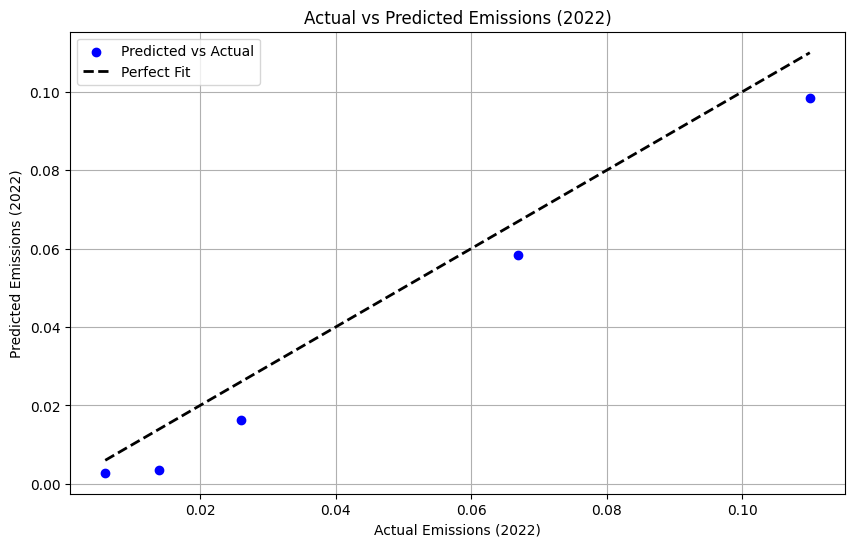

         2023       2024       2025       2026       2027       2028  \
0    0.058455   0.058455   0.058455   0.058455   0.058455   0.058455   
1    0.098567   0.098567   0.098567   0.098567   0.098567   0.098567   
2   12.263000  12.263000  12.263000  12.263000  12.263000  12.263000   
3    0.179000   0.179000   0.179000   0.179000   0.179000   0.179000   
4    0.035000   0.035000   0.035000   0.035000   0.035000   0.035000   
5    0.064000   0.064000   0.064000   0.064000   0.064000   0.064000   
6    0.102000   0.102000   0.102000   0.102000   0.102000   0.102000   
7    4.301000   4.301000   4.301000   4.301000   4.301000   4.301000   
8    0.003613   0.003613   0.003613   0.003613   0.003613   0.003613   
9    0.003000   0.003000   0.003000   0.003000   0.003000   0.003000   
10   0.001000   0.001000   0.001000   0.001000   0.001000   0.001000   
11   0.003000   0.003000   0.003000   0.003000   0.003000   0.003000   
12   0.005000   0.005000   0.005000   0.005000   0.005000   0.00

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Convert all column names to strings to ensure compatibility with scikit-learn
data_encoded.columns = data_encoded.columns.astype(str)

# Define features (X) as all years from 1990 to 2021 (excluding the target year 2022)
X = data_encoded.drop(columns=['2022'])  # We keep all the past years as features except for 2022

# Define the target variable (y) as the emission values for the year 2022
y = data_encoded['2022']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the emissions for the test set
y_pred = model.predict(X_test)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Model Performance Metrics on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Visualize the Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Emissions (2022)')
plt.ylabel('Predicted Emissions (2022)')
plt.title('Actual vs Predicted Emissions (2022)')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame to hold future year predictions
future_years = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030']
future_predictions = pd.DataFrame(index=data_encoded.index)

# For each future year, predict emissions using the trained model
for year in future_years:
    future_predictions[year] = model.predict(X)  # Use the same feature set to predict future emissions

# Show future predictions
print(future_predictions)

# Optionally, save the predictions to a CSV file
future_predictions.to_csv('future_emissions_predictions_decade.csv', index=False)


SVM

Model Performance Metrics on Test Set:
Mean Squared Error (MSE): 0.0095
Mean Absolute Error (MAE): 0.0780
Root Mean Squared Error (RMSE): 0.0974


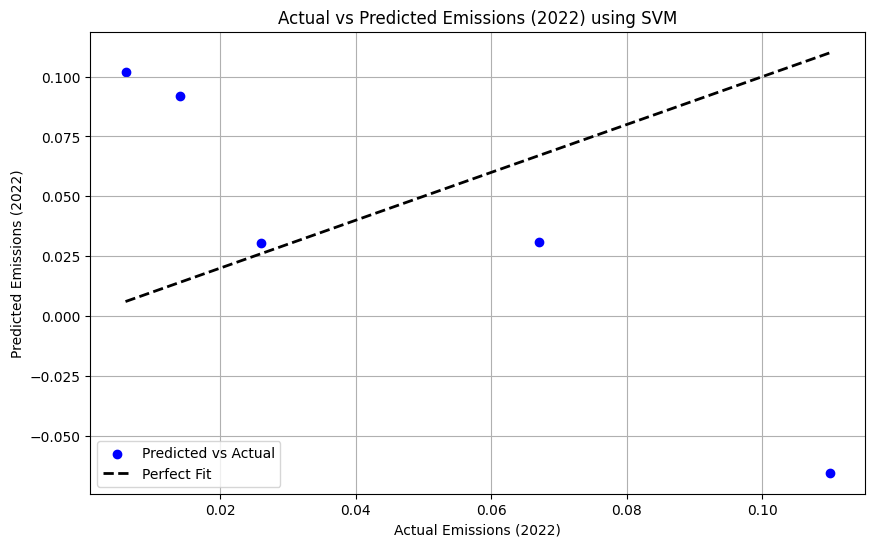

         2023       2024       2025       2026       2027       2028  \
0    0.030899   0.030899   0.030899   0.030899   0.030899   0.030899   
1   -0.065544  -0.065544  -0.065544  -0.065544  -0.065544  -0.065544   
2   12.162978  12.162978  12.162978  12.162978  12.162978  12.162978   
3    0.278658   0.278658   0.278658   0.278658   0.278658   0.278658   
4    0.135044   0.135044   0.135044   0.135044   0.135044   0.135044   
5    0.078529   0.078529   0.078529   0.078529   0.078529   0.078529   
6    0.002021   0.002021   0.002021   0.002021   0.002021   0.002021   
7    4.401021   4.401021   4.401021   4.401021   4.401021   4.401021   
8    0.091899   0.091899   0.091899   0.091899   0.091899   0.091899   
9    0.103105   0.103105   0.103105   0.103105   0.103105   0.103105   
10   0.101031   0.101031   0.101031   0.101031   0.101031   0.101031   
11   0.103165   0.103165   0.103165   0.103165   0.103165   0.103165   
12   0.105072   0.105072   0.105072   0.105072   0.105072   0.10

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Convert all column names to strings to ensure compatibility with scikit-learn
data_encoded.columns = data_encoded.columns.astype(str)

# Define features (X) as all years from 1990 to 2021 (excluding the target year 2022)
X = data_encoded.drop(columns=['2022'])  # We keep all the past years as features except for 2022

# Define the target variable (y) as the emission values for the year 2022
y = data_encoded['2022']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Support Vector Regression model
svm_model = SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.1)  # Using Radial Basis Function kernel
svm_model.fit(X_train, y_train)

# Predict the emissions for the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Model Performance Metrics on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Visualize the Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Emissions (2022)')
plt.ylabel('Predicted Emissions (2022)')
plt.title('Actual vs Predicted Emissions (2022) using SVM')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame to hold future year predictions
future_years = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030']
future_predictions = pd.DataFrame(index=data_encoded.index)

# For each future year, predict emissions using the trained SVM model
for year in future_years:
    future_predictions[year] = svm_model.predict(X)  # Use the same feature set to predict future emissions

# Show future predictions
print(future_predictions)

# Optionally, save the predictions to a CSV file
future_predictions.to_csv('svm_2023_2030.csv', index=False)